In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from mplsoccer.pitch import Pitch
import ast

In [2]:
df = pd.read_excel("Desktop/Drexel/DSCI-511/Football/pl_M12.xlsx")
df

,Match,Player Name,Shot Type,Situation,Player Coordinates,xg,xgot,goal,start,end,Incident Type
0,11352349,Mario Lemina,goal,assisted,"{'x': 8.1, 'y': 53.2, 'z': 0}",0.616613,0.9437,"{'x': 46.5, 'y': 98.7}","{'x': 53.2, 'y': 8.1}","{'x': 46.5, 'y': 0}",shot
1,11352349,Pablo Sarabia,goal,assisted,"{'x': 7.7, 'y': 40.5, 'z': 0}",0.269925,0.6472,"{'x': 45.8, 'y': 86.1}","{'x': 40.5, 'y': 7.7}","{'x': 45.8, 'y': 0}",shot
2,11352349,Giovani Lo Celso,save,assisted,"{'x': 18.4, 'y': 54.3, 'z': 0}",0.083587,0.4842,"{'x': 46.8, 'y': 66.5}","{'x': 54.3, 'y': 18.4}","{'x': 46.8, 'y': 0}",shot
3,11352349,Heung-min Son,block,fast-break,"{'x': 19.4, 'y': 44.5, 'z': 0}",0.115332,NaN,"{'x': 49.1, 'y': 81}","{'x': 44.5, 'y': 19.4}","{'x': 49.1, 'y': 0}",shot
4,11352349,Saša Kalajdžić,miss,assisted,"{'x': 8.4, 'y': 45, 'z': 0}",0.153851,NaN,"{'x': 38.7, 'y': 56.9}","{'x': 45, 'y': 8.4}","{'x': 38.7, 'y': 0}",shot
...,...,...,...,...,...,...,...,...,...,...,...
249,11352332,Conor Gallagher,save,regular,"{'x': 22.3, 'y': 55.8, 'z': 0}",0.049839,0.0298,"{'x': 50.5, 'y': 78.5}","{'x': 55.8, 'y': 22.3}","{'x': 50.5, 'y': 0}",shot
250,11352332,Joško Gvardiol,save,corner,"{'x': 13.3, 'y': 42.2, 'z': 0}",0.009272,0.0330,"{'x': 48.9, 'y': 93.7}","{'x': 42.2, 'y': 13.3}","{'x': 48.9, 'y': 0}",shot
251,11352332,Julián Álvarez,block,assisted,"{'x': 6.2, 'y': 70.2, 'z': 0}",0.036596,NaN,"{'x': 51.5, 'y': 81}","{'x': 70.2, 'y': 6.2}","{'x': 51.5, 'y': 0}",shot
252,11352332,Cole Palmer,block,assisted,"{'x': 12.4, 'y': 68.6, 'z': 0}",0.038994,NaN,"{'x': 51.3, 'y': 81}","{'x': 68.6, 'y': 12.4}","{'x': 51.3, 'y': 0}",shot


In [3]:

# Group by 'Player Name'
grouped_df = df.groupby('Player Name')


result_df = grouped_df.agg({
    'Shot Type': 'count',  # Count of shots for each player
    'xg': 'mean',          # Mean of Xg for each player
    'xgot': 'mean',        # Mean of Xgot for each player
})


result_df.columns = ['Shot Count', 'Average Xg', 'Average Xgot']

print(result_df)

                    Shot Count  Average Xg  Average Xgot
Player Name                                             
Abdoulaye Doucouré           1    0.723549        0.1424
Adam Webster                 2    0.128689           NaN
Alejandro Garnacho           1    0.078750           NaN
Alex Iwobi                   2    0.032674        0.0188
Andros Townsend              3    0.030942        0.2647
...                        ...         ...           ...
Willian                      3    0.068979        0.0640
Yehor Yarmoliuk              1    0.048467           NaN
Yoane Wissa                  1    0.136084           NaN
Youri Tielemans              1    0.076891        0.2929
Zeki Amdouni                 1    0.048135        0.1405

[149 rows x 3 columns]


In [4]:
# Sort the DataFrame based on 'Average Xg' in descending order
result_df_xg = result_df.sort_values(by='Average Xg', ascending=False)

print("Players ordered by Average Xg:")
print(result_df_xg)

result_df_xgot = result_df.sort_values(by='Average Xgot', ascending=False)

print("\nPlayers ordered by Average Xgot:")
print(result_df_xgot)

Players ordered by Average Xg:
                    Shot Count  Average Xg  Average Xgot
Player Name                                             
Abdoulaye Doucouré           1    0.723549      0.142400
William Saliba               1    0.644268      0.976300
Ollie Watkins                3    0.635281      0.980700
Gustavo Hamer                1    0.614866           NaN
Erling Haaland               4    0.507700      0.780833
...                        ...         ...           ...
Neal Maupay                  1    0.013986           NaN
Diogo Dalot                  1    0.013256           NaN
Joško Gvardiol               1    0.009272      0.033000
Luca Koleosho                1    0.007895           NaN
Antonee Robinson             1         NaN           NaN

[149 rows x 3 columns]

Players ordered by Average Xgot:
                   Shot Count  Average Xg  Average Xgot
Player Name                                            
Ollie Watkins               3    0.635281        0.9807
Wi

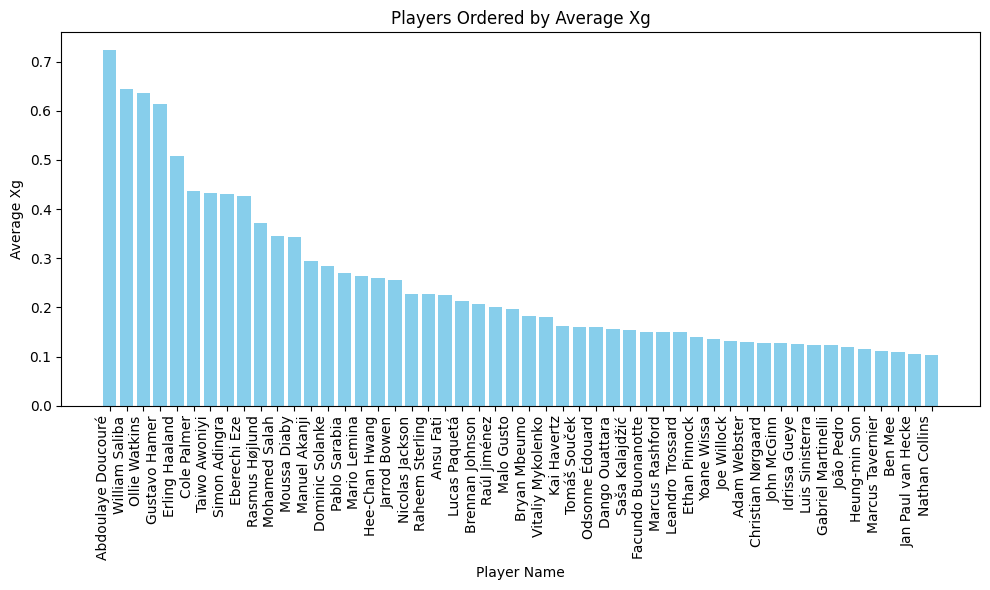

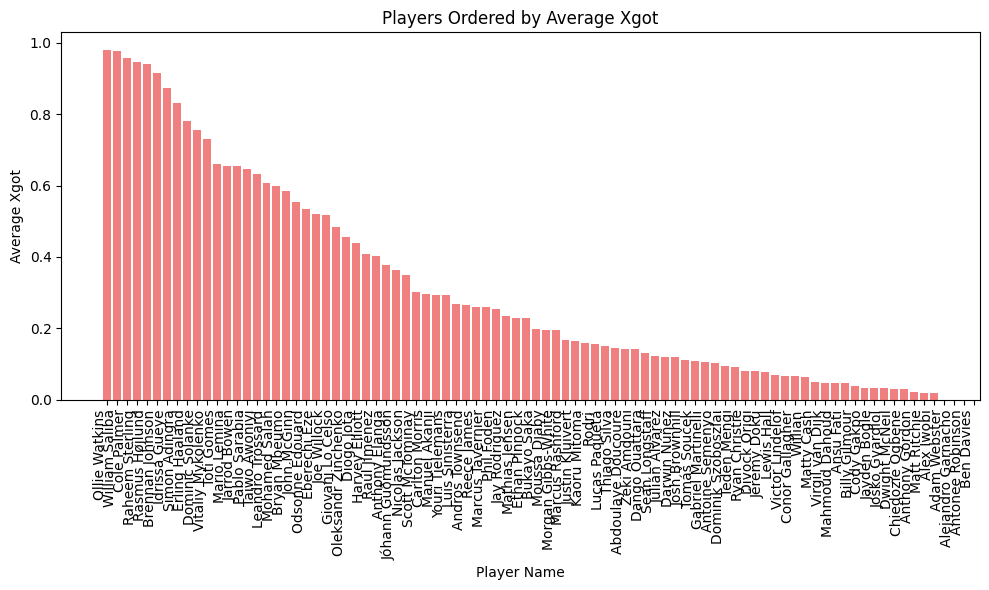

In [5]:

result_df_xgtop = result_df_xg.sort_values(by='Average Xg', ascending=False).head(50)
# Plotting horizontal bar chart for Average Xg
plt.figure(figsize=(10, 6))
plt.bar(result_df_xgtop.index, result_df_xgtop['Average Xg'], color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Average Xg')
plt.title('Players Ordered by Average Xg')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Plotting horizontal bar chart for Average Xgot
plt.figure(figsize=(10, 6))
plt.bar(result_df_xgot.index, result_df_xgot['Average Xgot'], color='lightcoral')
plt.xlabel('Player Name')
plt.ylabel('Average Xgot')
plt.title('Players Ordered by Average Xgot')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


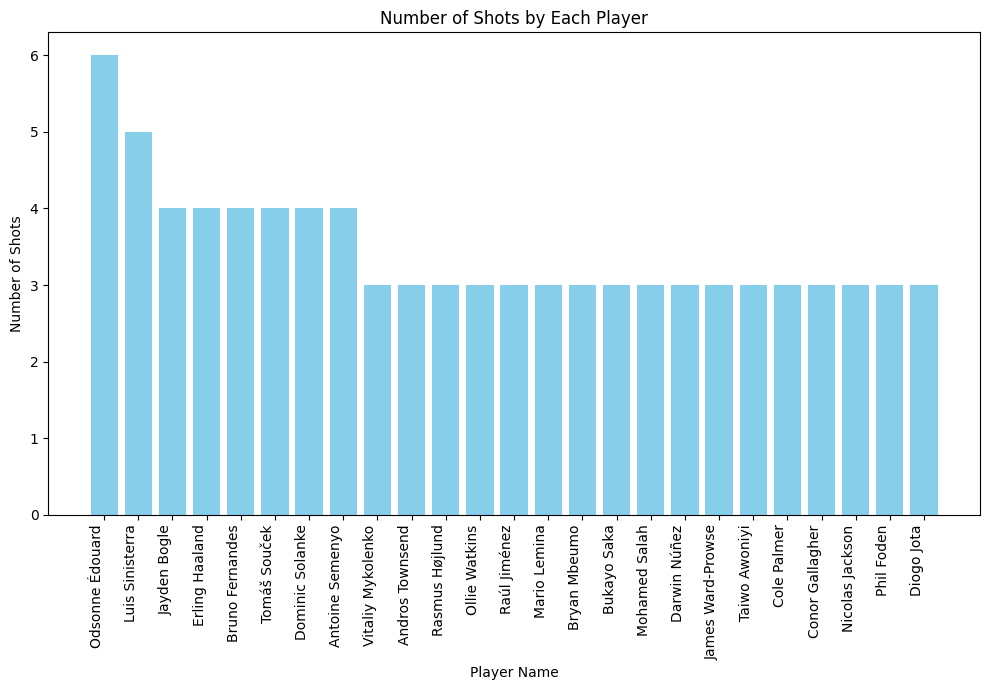

In [6]:

shots_count = Counter(df['Player Name'])

shots_count_df = pd.DataFrame(list(shots_count.items()), columns=['Player Name', 'Shots Count'])

shots_count_df = shots_count_df.sort_values(by='Shots Count', ascending=False).head(25)

plt.figure(figsize=(10, 7))

plt.bar(shots_count_df['Player Name'], shots_count_df['Shots Count'], color='skyblue')

plt.xlabel('Player Name')
plt.ylabel('Number of Shots')
plt.title('Number of Shots by Each Player')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

/var/folders/3h/rjpld5qj6yj68h8vd8f4t56c0000gp/T/ipykernel_25765/1426048404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_both_values['CombinedMetric'] = df_both_values['xg'] + df_both_values['xgot']


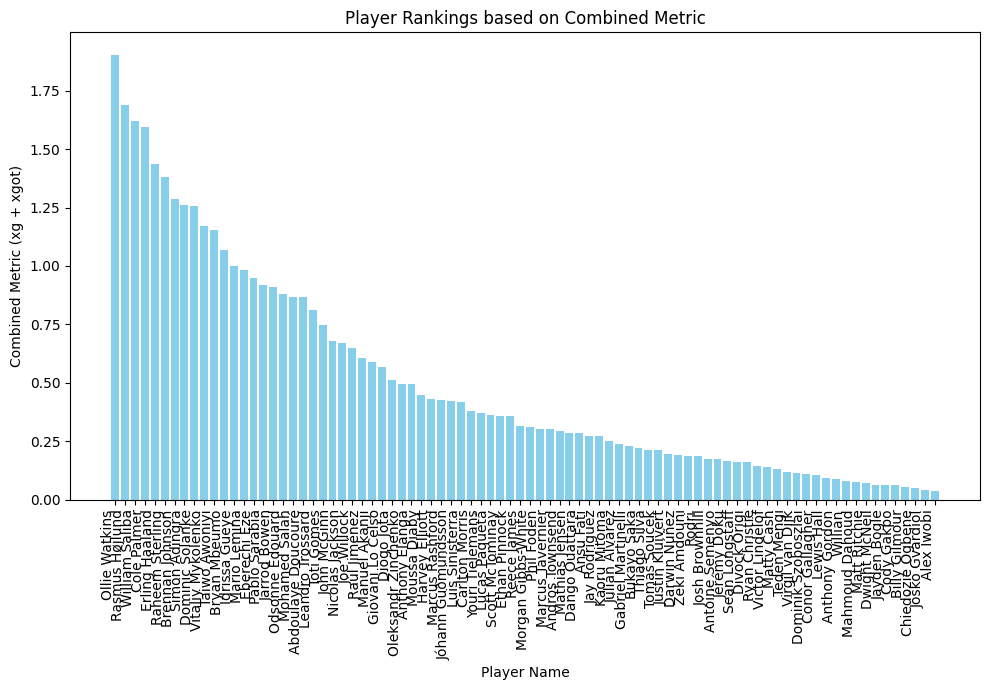

In [7]:

df_both_values = df.dropna(subset=['xg', 'xgot'])

# Calculate a combined metric (e.g., sum of Xg and Xgot)
df_both_values['CombinedMetric'] = df_both_values['xg'] + df_both_values['xgot']

# Rank players based on the combined metric
ranked_players = df_both_values.groupby('Player Name')['CombinedMetric'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 7))

plt.bar(ranked_players.index, ranked_players.values, color='skyblue')

plt.xlabel('Player Name')
plt.ylabel('Combined Metric (xg + xgot)')
plt.title('Player Rankings based on Combined Metric')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

<Figure size 1000x700 with 0 Axes>

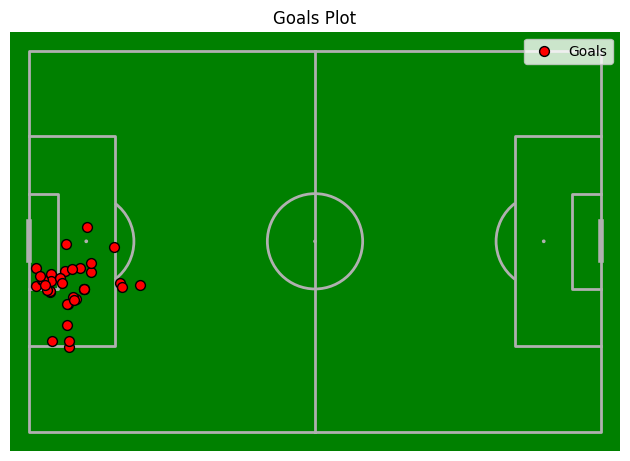

In [8]:
# Convert the 'player coordinates' column to a dictionary
df['Player Coordinates'] = df['Player Coordinates'].apply(ast.literal_eval)

goal_shots_df = df[df['Shot Type'] == 'goal']

plt.figure(figsize=(10, 7))

pitch = Pitch(pitch_type='statsbomb', pitch_color='green')

fig, ax = pitch.draw()

sc = pitch.scatter(goal_shots_df['Player Coordinates'].apply(lambda x: x['x']),
                   goal_shots_df['Player Coordinates'].apply(lambda x: x['y']),
                   s=50,  # marker size
                   color='red', edgecolors='black', ax=ax, zorder=5, label='Goals')

ax.set_title('Goals Plot')
ax.legend()

plt.show()


/var/folders/3h/rjpld5qj6yj68h8vd8f4t56c0000gp/T/ipykernel_25765/1265724146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_shots_df['Player Coordinates'] = miss_shots_df['Player Coordinates'].apply(lambda x: {'x': x['x'], 'y': x['y']})


<Figure size 1000x700 with 0 Axes>

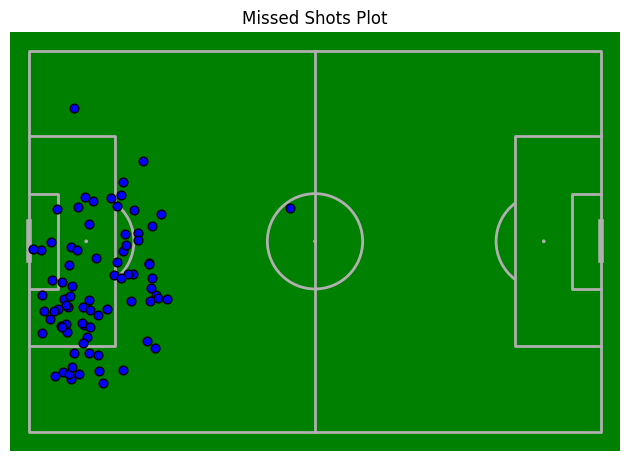

In [9]:
# Filter DataFrame for shots where shot type is 'miss'
miss_shots_df = df.loc[df['Shot Type'] == 'miss']

miss_shots_df['Player Coordinates'] = miss_shots_df['Player Coordinates'].apply(lambda x: {'x': x['x'], 'y': x['y']})

plt.figure(figsize=(10, 7))

pitch = Pitch(pitch_type='statsbomb', pitch_color='green')

fig, ax = pitch.draw()

sc_miss = pitch.scatter(miss_shots_df['Player Coordinates'].apply(lambda x: x['x']),
                        miss_shots_df['Player Coordinates'].apply(lambda x: x['y']),
                        s=40,  # marker size
                        color='blue', edgecolors='black', ax=ax, zorder=5, label='Misses')

  
ax.set_title('Missed Shots Plot')

plt.show()


/var/folders/3h/rjpld5qj6yj68h8vd8f4t56c0000gp/T/ipykernel_25765/1770669809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_shots_df['Player Coordinates'] = miss_shots_df['Player Coordinates'].apply(lambda x: {'x': x['x'], 'y': x['y']})


<Figure size 1000x700 with 0 Axes>

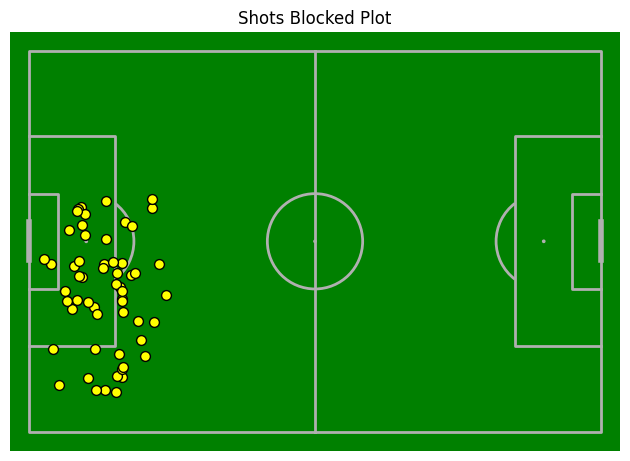

In [10]:
miss_shots_df = df.loc[df['Shot Type'] == 'block']

# Extract only 'x' and 'y' coordinates, ignoring 'z'
miss_shots_df['Player Coordinates'] = miss_shots_df['Player Coordinates'].apply(lambda x: {'x': x['x'], 'y': x['y']})

plt.figure(figsize=(10, 7))

# Create a soccer pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='green')

# Plot the soccer pitch
fig, ax = pitch.draw()

sc_miss = pitch.scatter(miss_shots_df['Player Coordinates'].apply(lambda x: x['x']),
                        miss_shots_df['Player Coordinates'].apply(lambda x: x['y']),
                        s=50,  # marker size
                        color='yellow', edgecolors='black', ax=ax, zorder=5, label='Blocked')


ax.set_title('Shots Blocked Plot')
plt.show()


/var/folders/3h/rjpld5qj6yj68h8vd8f4t56c0000gp/T/ipykernel_25765/3332068803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_shots_df['Player Coordinates'] = miss_shots_df['Player Coordinates'].apply(lambda x: {'x': x['x'], 'y': x['y']})


<Figure size 1000x700 with 0 Axes>

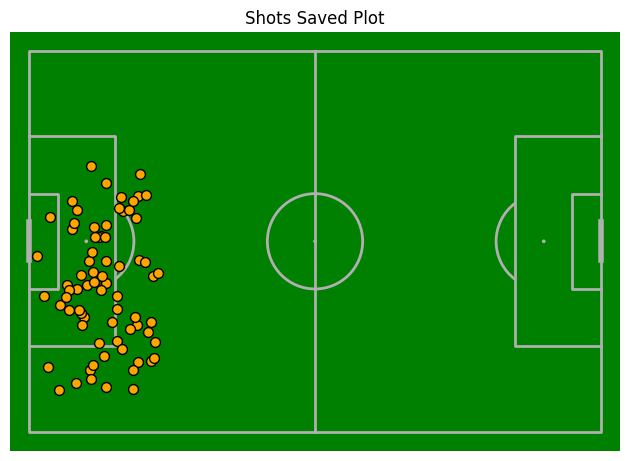

In [11]:
miss_shots_df = df.loc[df['Shot Type'] == 'save']

miss_shots_df['Player Coordinates'] = miss_shots_df['Player Coordinates'].apply(lambda x: {'x': x['x'], 'y': x['y']})


plt.figure(figsize=(10, 7))

pitch = Pitch(pitch_type='statsbomb', pitch_color='green')


fig, ax = pitch.draw()


sc_miss = pitch.scatter(miss_shots_df['Player Coordinates'].apply(lambda x: x['x']),
                        miss_shots_df['Player Coordinates'].apply(lambda x: x['y']),
                        s=50,  
                        color='orange', edgecolors='black', ax=ax, zorder=5, label='Saved')


ax.set_title('Shots Saved Plot')
plt.show()


In [12]:
avg_xg_by_player = df.groupby('Player Name')['xg'].mean()
top_players = avg_xg_by_player.nlargest(5)


print("Top 5 Players with Highest Average Xg:")
print(top_players)

Top 5 Players with Highest Average Xg:
Player Name
Abdoulaye Doucouré    0.723549
William Saliba        0.644268
Ollie Watkins         0.635281
Gustavo Hamer         0.614866
Erling Haaland        0.507700
Name: xg, dtype: float64


In [13]:
top_players_list = top_players.index.tolist()

print("Top 5 Players with Highest Average Xg:")
print(top_players_list)

Top 5 Players with Highest Average Xg:
['Abdoulaye Doucouré', 'William Saliba', 'Ollie Watkins', 'Gustavo Hamer', 'Erling Haaland']


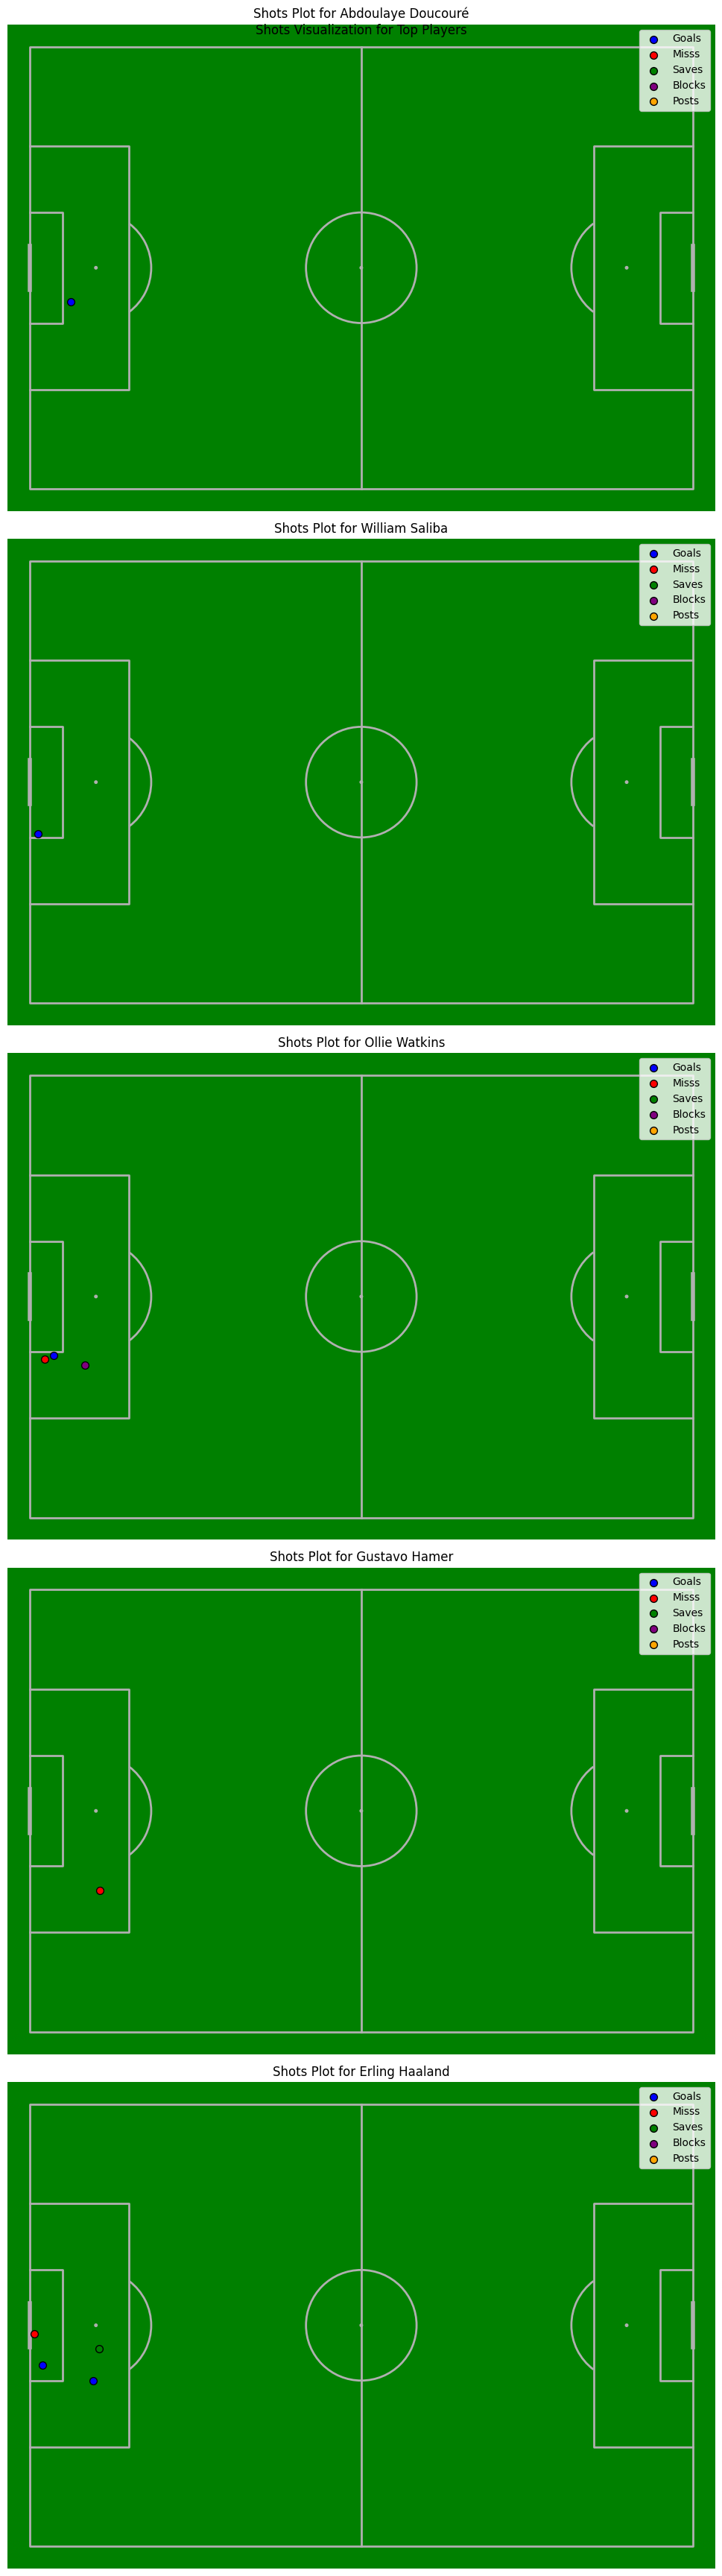

In [14]:
fig, axs = plt.subplots(len(top_players_list), figsize=(10, 7 * len(top_players_list)))
fig.suptitle('Shots Visualization for Top Players')

pitch = Pitch(pitch_type='statsbomb', pitch_color='green')

for i, player_name in enumerate(top_players_list):
    player_shots_df = df[df['Player Name'] == player_name]
    
    ax = axs[i]
    pitch.draw(ax=ax)

    # Define a color map
    shot_type_colors = {
        'goal': 'blue',
        'miss': 'red',
        'save': 'green',
        'block': 'purple',  
        'post': 'orange',  # Adjust the colors based on your preference
    }

    for shot_type, color in shot_type_colors.items():
        shot_type_df = player_shots_df[player_shots_df['Shot Type'] == shot_type]

        pitch.scatter(shot_type_df['Player Coordinates'].apply(lambda x: x['x']),
                      shot_type_df['Player Coordinates'].apply(lambda x: x['y']),
                      s=50,  # marker size
                      color=color, edgecolors='black', ax=ax, zorder=5, label=f'{shot_type.capitalize()}s')

    ax.set_title(f'Shots Plot for {player_name}')
    ax.legend()

plt.tight_layout()

plt.show()

Enter the player's name:  Ollie Watkins


<Figure size 1000x700 with 0 Axes>

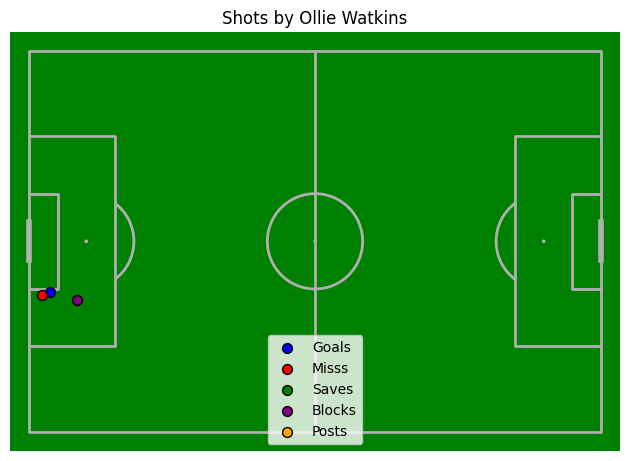

In [15]:

player_name_input = input("Enter the player's name: ")


player_shots_df = df[df['Player Name'] == player_name_input]


if player_shots_df.empty:
    print(f"No shots found for {player_name_input}.")
else:
    # Set the figure size using Matplotlib
    plt.figure(figsize=(10, 7))

    # Create a soccer pitch
    pitch = Pitch(pitch_type='statsbomb', pitch_color='green')

    # Plot the soccer pitch
    fig, ax = pitch.draw()

    # Define a color map for different shot types
    shot_type_colors = {
        'goal': 'blue',
        'miss': 'red',
        'save': 'green',
        'block': 'purple',  
        'post': 'orange',  # Adjust the colors based on your preference
    }

    for shot_type, color in shot_type_colors.items():
        shot_type_df = player_shots_df[player_shots_df['Shot Type'] == shot_type]

        pitch.scatter(shot_type_df['Player Coordinates'].apply(lambda x: x['x']),
                      shot_type_df['Player Coordinates'].apply(lambda x: x['y']),
                      s=50,  # marker size
                      color=color, edgecolors='black', ax=ax, zorder=5, label=f'{shot_type.capitalize()}s')

    ax.set_title(f'Shots by {player_name_input}')
    ax.legend()

    # Show the plot
    plt.show()
